In [31]:
import cv2
import numpy as np
import keras
import os
import matplotlib.pyplot as plt
from random import shuffle
from sklearn.model_selection import train_test_split
from random import shuffle
from sklearn.metrics import classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [32]:
#test
imageSize = 32
path = "D:/Snake/KingCobra/train_data_dir/image"
train_data_dir = "D:/Snake/KingCobra/train_data_dir"
validation_data_dir = "D:/Snake/KingCobra/validation_data_dir"

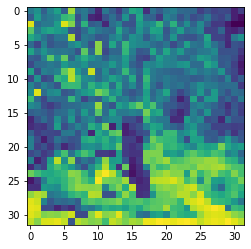

In [33]:
for img in os.listdir(path):  #ชื่อcategories แต่ล่ะตัว
    paths = os.path.join(path,img)
#     img_arrays = cv2.imread(paths,cv2.COLOR_BGR2RGB)
    img_arrays = cv2.imread(paths,cv2.IMREAD_GRAYSCALE)
    img_arrays = cv2.resize(img_arrays,(imageSize,imageSize))
    plt.imshow(img_arrays)

#             plt.imshow(imgx)
plt.show()

In [34]:

train_datagen = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    ) # set validation split

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(imageSize, imageSize),#256
    batch_size=32,
    class_mode='binary',
    ) # set as training data

validation_generator = train_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(imageSize, imageSize),#256
    batch_size=32,
    class_mode='binary',
    ) # set as validation data

# model.fit_generator(
#     train_generator,
#     steps_per_epoch = train_generator.samples // batch_size,
#     validation_data = validation_generator, 
#     validation_steps = validation_generator.samples // batch_size,
#     epochs = 5)

Found 152 images belonging to 1 classes.
Found 43 images belonging to 1 classes.


In [35]:
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Flatten, MaxPooling2D
from keras.layers import Activation ,Dropout

In [36]:
snake = Sequential()
snake.add(Conv2D(64, (3, 3),padding='same', input_shape = (imageSize, imageSize,3)))
snake.add(Activation('relu'))
snake.add(MaxPooling2D(pool_size=(2,2)))
snake.add(Activation('relu'))
snake.add(Conv2D(128, (3, 3)))
snake.add(Activation('relu'))
snake.add(MaxPooling2D(pool_size=(2, 2)))
snake.add(Activation('relu'))
snake.add(Flatten())
snake.add(Dropout(0.5))
snake.add(Dense(256))
snake.add(Activation('relu'))
snake.add(Dense(1))
snake.add(Activation('sigmoid'))

In [37]:
snake.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [38]:
sk=snake.fit_generator(
    train_generator,
    steps_per_epoch = train_generator.samples, ## batch_size,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples, ## batch_size,
    epochs = 2)

Epoch 1/2
152/152 [==============================] - 152s 1s/step - loss: 0.0065 - acc: 0.9936 - val_loss: 1.0000e-07 - val_acc: 1.0000
Epoch 2/2
152/152 [==============================] - 155s 1s/step - loss: 1.0000e-07 - acc: 1.0000 - val_loss: 1.0000e-07 - val_acc: 1.0000


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


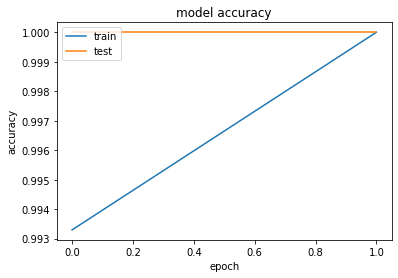

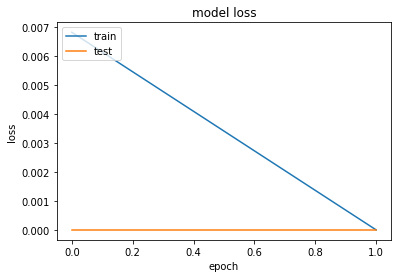

In [42]:
print(sk.history.keys())
# summarize history for accuracy
plt.plot(sk.history['acc'])
plt.plot(sk.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(sk.history['loss'])
plt.plot(sk.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()